In [1]:
import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

# Estimation and Confidence Intervals

*Dan L. Nicolae*

In the [previous chapter](../13/HypothesisTesting_Intro.ipynb), we introduced hypothesis testing as a way to assess the consistency of a dataset, or a sample, with a data-generating model. Specifically, we saw examples of scenarios where we may use hypothesis testing to evaluate whether a statistic calulcated from a sample (e.g., mean) is consistent with the statistic calculated from a data-generating model. We also evaluated hypothesis testing to determine whether two samples (or groups) are statistically different from one another. 

In this chapter, we will investigate methods for learning about (also called **estimating**) a population characteristic (called **parameter**). These methods also establish our confidence in whether to reject or fail to reject a null hypothesis.

The diagram below shows the assumptions we will build on when it comes to estimating a parameter:

- We have a population of interest (for example, the annual salaries for all City of Chicago employees).
- The interest is in a parameter (a numerical characteristic) of that population denoted by $\theta$ (for example, median salary for all City of Chicago employees).
- A sample of size $n$ is drawn from the population using a specified sampling scheme (for example, a simple random sample).
- From the data in the sample, a statistic $\hat\theta$ is calculated (for example, the median of the salaries in the sample); this statistic is used as an estimate for the parameter of interest.

<img align="center" src="./sample.png" width="500"/>

The data shown below was downloaded from the [City of Chicago](https://www.chicago.gov/city/en/depts/dhr/dataset/current_employeenamessalariesandpositiontitles.html) in June 2023 and contains data for 24,365 employees. The file was processed to simplify our illustration here: some columns that are not needed were removed, and only rows having data on annual salaries were retained. Five random data points (rows in the DataFrame) are shown. 

In [7]:
population_salary=pd.read_csv("../data/Salaries.csv")
population_salary.shape

(24365, 3)

In [9]:
population_salary.sample(5,replace=False)

,Job Titles,Department,Annual Salary
14654,POLICE COMMUNICATIONS OPERATOR I,OFFICE OF EMERGENCY MANAGEMENT,90036.0
6022,FIREFIGHTER-EMT,FIRE DEPARTMENT,62466.0
19688,FIREFIGHTER-EMT,FIRE DEPARTMENT,98904.0
8062,POLICE OFFICER / FLD TRNG OFFICER,DEPARTMENT OF POLICE,102906.0
14806,COMMANDER,DEPARTMENT OF POLICE,175944.0


The above data represents our population, and we assume we are interested in the median salary - this is the parameter of interest, and it is equal to $101,262 as shown by output of the cell code below:

In [13]:
theta=population_salary['Annual Salary'].median()
theta

101262.0

Suppose we would like to learn about this parameter not by collecting the data on the whole population, which can be expensive and/or impractical, but by obtaining a simple random sample of size, let's say, $n=100$. We simulate this process below twice.

In [15]:
np.random.seed(1234)

# a simple random sample of 100 observations (rows)
sample1_salary=population_salary.sample(100,replace=False)

# the median salary in the sample
theta_hat1=sample1_salary['Annual Salary'].median()
theta_hat1

98904.0

Recall that we introduced and discussed the role of `np.random.seed()` in [Section 9](../10/sampling.ipynb)

In [19]:
np.random.seed(4321)

# a simple random sample of 100 observations (rows)
sample2_salary=population_salary.sample(100,replace=False)

# the median salary in the sample
theta_hat2=sample2_salary['Annual Salary'].median()
theta_hat2

100644.0

As you can see above, different samples will lead to different estimated values - some closer and some further away from the true value. To understand the properties of our estimate (its accuracy, for example), we need to understand its sampling distribution - see [Chapter 11](../12/empirical_distributions.ipynb) for a more in-depth discussion of distributions. The picture below shows a schematic that provides intuition on the sampling distribution:

<img align="center" src="./sampling_dist.png" width="500"/>

The sampling distribution can be approximated by calculating the statistic of interest in repeated samples drawn using the same sampling scheme and with the same sample size.

Below, we construct an approximation for the sampling distribution of the sample median in simple random samples of size 100. We simulate 10,000 simple random samples and calculate their medians.

In [23]:
# the array where sample medians will be stored
sampling_distribution=np.array([])

# the number of samples we will generate
n_sample=10000

# for each sample in `n_sample`, randomly sample 
for i in range(n_sample):
    sampling_distribution=np.append(sampling_distribution,
                                    population_salary.sample(100,replace=False)['Annual Salary'].median())

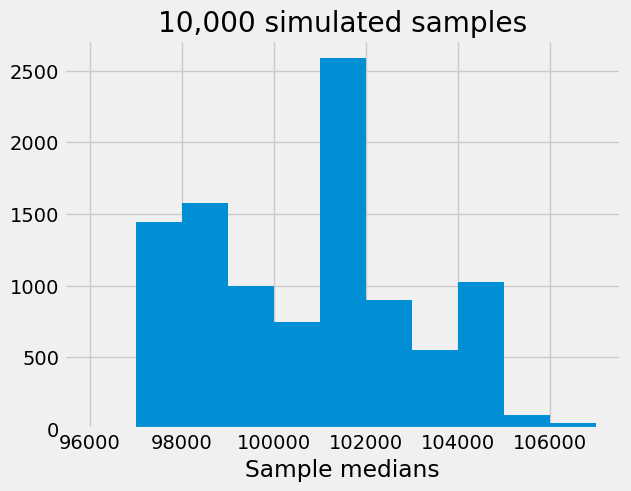

In [25]:
# histogram of the 10,000 sample medians
# this is an approximation of the sampling distribution
plt.hist(sampling_distribution,bins=np.arange(96000,108000,1000))
plt.title('10,000 simulated samples')
plt.xlabel("Sample medians");

Note that properties of the estimator are reflected by its sampling distribution. From the above plot:
-  The true value calculated from the population (\$101,262) seems to be close to the center of the histogram;
-  Most of the sample medians are within $\$3000-\$4,000$ of the population median.

It is clear that if we report only the estimator, we provide incomplete information on the population parameter. The second bullet point above suggests that we can report a range of plausible values that has a good chance of capturing the parameter. A plausible range of values for the population parameter is called a **confidence interval (CI)**.